<a href="https://colab.research.google.com/github/Dennieeeee/Real-Estate-House-Price-Prediction/blob/master/Boston_House_Price_Prediction(PART_1_Data_Cleansing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.neighbors import LocalOutlierFactor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
file='https://raw.githubusercontent.com/Dennieeeee/Real-Estate-House-Price-Prediction/master/boston_housing.csv'
df=pd.read_csv(file)

In [ ]:
df.head(1)

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Condo/Co-op,1466 Commonwealth Ave #1,Boston,MA,2135,599000,3.0,1.0,Brighton,1346.0,1346.0,1925.0,1,445.0,451.0,Active,June-28-2020 01:30 PM,June-28-2020 03:00 PM,http://www.redfin.com/MA/Boston/1466-Commonwea...,MLS PIN,72681122,N,Y,42.347122,-71.140307


#Data Cleansing
- Remove unnecessary features
- Remove rows with 0 bedding
- Outliers
- Handle missing values
- Ensure the overall data quality

In [ ]:
#drop unnecessary features
columns=['SOLD DATE','NEXT OPEN HOUSE START TIME','NEXT OPEN HOUSE END TIME','URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
                'SOURCE','MLS#','DAYS ON MARKET']
df=df.drop(columns,axis=1)


In [ ]:
df.head(3)

,SALE TYPE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,STATUS,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,Condo/Co-op,1466 Commonwealth Ave #1,Boston,MA,2135,599000,3.0,1.0,Brighton,1346.0,1346.0,1925.0,445.0,451.0,Active,N,Y,42.347122,-71.140307
1,MLS Listing,Townhouse,43 Leyden St #43,Boston,MA,2128,659800,3.0,2.5,East Boston's Orient Heights,1397.0,1889.0,2006.0,472.0,441.0,Active,N,Y,42.390130,-71.010972
2,MLS Listing,Condo/Co-op,603 E 6Th St #1,Boston,MA,2127,1199000,3.0,2.5,Boston,2018.0,NaN,1900.0,594.0,320.0,Active,N,Y,42.332858,-71.036264


In [ ]:
#check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SALE TYPE           350 non-null    object 
 1   PROPERTY TYPE       350 non-null    object 
 2   ADDRESS             350 non-null    object 
 3   CITY                350 non-null    object 
 4   STATE OR PROVINCE   350 non-null    object 
 5   ZIP OR POSTAL CODE  350 non-null    int64  
 6   PRICE               350 non-null    int64  
 7   BEDS                349 non-null    float64
 8   BATHS               349 non-null    float64
 9   LOCATION            350 non-null    object 
 10  SQUARE FEET         349 non-null    float64
 11  LOT SIZE            193 non-null    float64
 12  YEAR BUILT          349 non-null    float64
 13  $/SQUARE FEET       349 non-null    float64
 14  HOA/MONTH           270 non-null    float64
 15  STATUS              350 non-null    object 
 16  FAVORITE

In [ ]:
df.isnull().sum()

SALE TYPE               0
PROPERTY TYPE           0
ADDRESS                 0
CITY                    0
STATE OR PROVINCE       0
ZIP OR POSTAL CODE      0
PRICE                   0
BEDS                    1
BATHS                   1
LOCATION                0
SQUARE FEET             1
LOT SIZE              157
YEAR BUILT              1
$/SQUARE FEET           1
HOA/MONTH              80
STATUS                  0
FAVORITE                0
INTERESTED              0
LATITUDE                0
LONGITUDE               0
dtype: int64

In [ ]:
df.describe()

,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
count,350.000000,3.500000e+02,349.000000,349.000000,349.000000,193.000000,349.000000,349.000000,270.000000,350.000000,350.000000
mean,2141.237143,1.149418e+06,2.541547,1.898281,1523.148997,2925.544041,1940.297994,783.819484,984.074074,42.334072,-71.083660
std,65.200535,1.287596e+06,1.578090,0.937162,1011.692803,2941.781764,68.150210,437.005542,6105.238006,0.032294,0.039567
min,2026.000000,2.350000e+05,0.000000,1.000000,293.000000,370.000000,1087.000000,129.000000,107.000000,42.232938,-71.172864
25%,2118.000000,5.790000e+05,2.000000,1.000000,846.000000,952.000000,1900.000000,463.000000,227.000000,42.315013,-71.114098
50%,2127.000000,7.499500e+05,2.000000,2.000000,1238.000000,1605.000000,1920.000000,705.000000,367.500000,42.341268,-71.074068
75%,2132.000000,1.193000e+06,3.000000,2.500000,1813.000000,4120.000000,2000.000000,1007.000000,581.250000,42.353596,-71.054172
max,2467.000000,1.399500e+07,12.000000,6.000000,8200.000000,16857.000000,2021.000000,3355.000000,99999.000000,42.391548,-70.995862


#Preparing the dataset

In [ ]:
#remove rows with 0 bedding
df1 = df.loc[~(df[df.columns[:-1]] == 0).any(axis=1)]

In [ ]:
#rename everything
#upper case to lower case
#apply the naming convention: add underscore
df1 = df1.rename(columns={'SALE TYPE':'sale_type','PROPERTY TYPE':'property_type', 'ADDRESS':'address', 'CITY':'city', 'STATE OR PROVINCE':'state_or_province',
       'ZIP OR POSTAL CODE':'zip_code', 'PRICE':'price', 'BEDS':'beds', 'BATHS':'baths', 'LOCATION':'location',
       'SQUARE FEET':'square_feet', 'LOT SIZE':'lot_size', 'YEAR BUILT':'year_built', '$/SQUARE FEET':'amount_per_square_feet', 'HOA/MONTH':'HOA_per_month',
       'STATUS':'status', 'FAVORITE':'favorite', 'INTERESTED':'interested', 'LATITUDE':'latitude', 'LONGITUDE':'longitude'
})


In [ ]:
# Replace BEDS and BATHS missing values with average
df1['beds'].fillna(df1['beds'].mean(),inplace=True)
df1['baths'].fillna(df1['baths'].mean(),inplace=True)
df1['square_feet'].fillna(df1['square_feet'].mean(),inplace=True)

In [ ]:
df1=df1.dropna()

In [ ]:
df1.describe()

,zip_code,price,beds,baths,square_feet,lot_size,year_built,amount_per_square_feet,HOA_per_month,latitude,longitude
count,116.000000,1.160000e+02,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,2125.198276,9.351388e+05,2.060345,1.538793,1152.034483,1709.758621,1930.767241,809.758621,1380.146552,42.337190,-71.074904
std,18.692579,8.845641e+05,0.772222,0.622585,606.426080,2129.786075,47.353868,341.465298,9265.892095,0.027143,0.035219
min,2108.000000,3.350000e+05,1.000000,1.000000,293.000000,370.000000,1850.000000,237.000000,110.000000,42.260633,-71.169289
25%,2116.000000,5.399750e+05,2.000000,1.000000,782.000000,798.000000,1899.000000,498.000000,219.750000,42.331997,-71.085432
50%,2122.000000,6.870000e+05,2.000000,1.000000,1011.500000,1032.500000,1905.000000,753.000000,350.000000,42.341677,-71.070285
75%,2128.000000,9.017500e+05,2.250000,2.000000,1368.000000,1533.000000,1983.000000,1034.250000,478.000000,42.353390,-71.052340
max,2215.000000,7.450000e+06,5.000000,3.500000,4300.000000,10018.000000,2020.000000,1806.000000,99999.000000,42.390130,-70.995862


In [ ]:
print(df.shape,df1.shape)

(350, 20) (116, 20)


In [ ]:
df1.isnull().sum()

sale_type                 0
property_type             0
address                   0
city                      0
state_or_province         0
zip_code                  0
price                     0
beds                      0
baths                     0
location                  0
square_feet               0
lot_size                  0
year_built                0
amount_per_square_feet    0
HOA_per_month             0
status                    0
favorite                  0
interested                0
latitude                  0
longitude                 0
dtype: int64

In [ ]:
bedding_count_1=df1.loc[df1['beds']==1]
bedding_count_2=df1.loc[df1['beds']==2]
bedding_count_3=df1.loc[df1['beds']==3]
bedding_count_4=df1.loc[df1['beds']==4]
bedding_count_5=df1.loc[df1['beds']==5]
print(bedding_count_1.shape,bedding_count_2.shape,bedding_count_3.shape,bedding_count_4.shape,bedding_count_5.shape)

(26, 20) (61, 20) (26, 20) (2, 20) (1, 20)


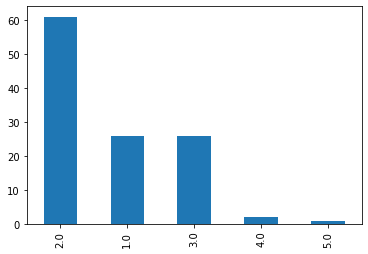

In [ ]:
df1['beds'].value_counts().plot(kind='bar')

In [ ]:
avg_price = df1.groupby(['location','year_built']).agg({'price':'mean','price':'median'})
sorted_avgPrice = print(avg_price.reset_index().sort_values(['price','year_built'],ascending=False))

                location  year_built    price
49               Midtown      2001.0  7450000
83            Waterfront      1850.0  4250000
3               Back Bay      1863.0  2725000
52             North End      1899.0  2595000
87            Waterfront      1987.0  2495000
..                   ...         ...      ...
35           East Boston      1900.0   399897
24              Brighton      1930.0   388000
17                Boston      1926.0   374900
15                Boston      1910.0   359000
31  Dorchester's Ashmont      1960.0   335000

[92 rows x 3 columns]


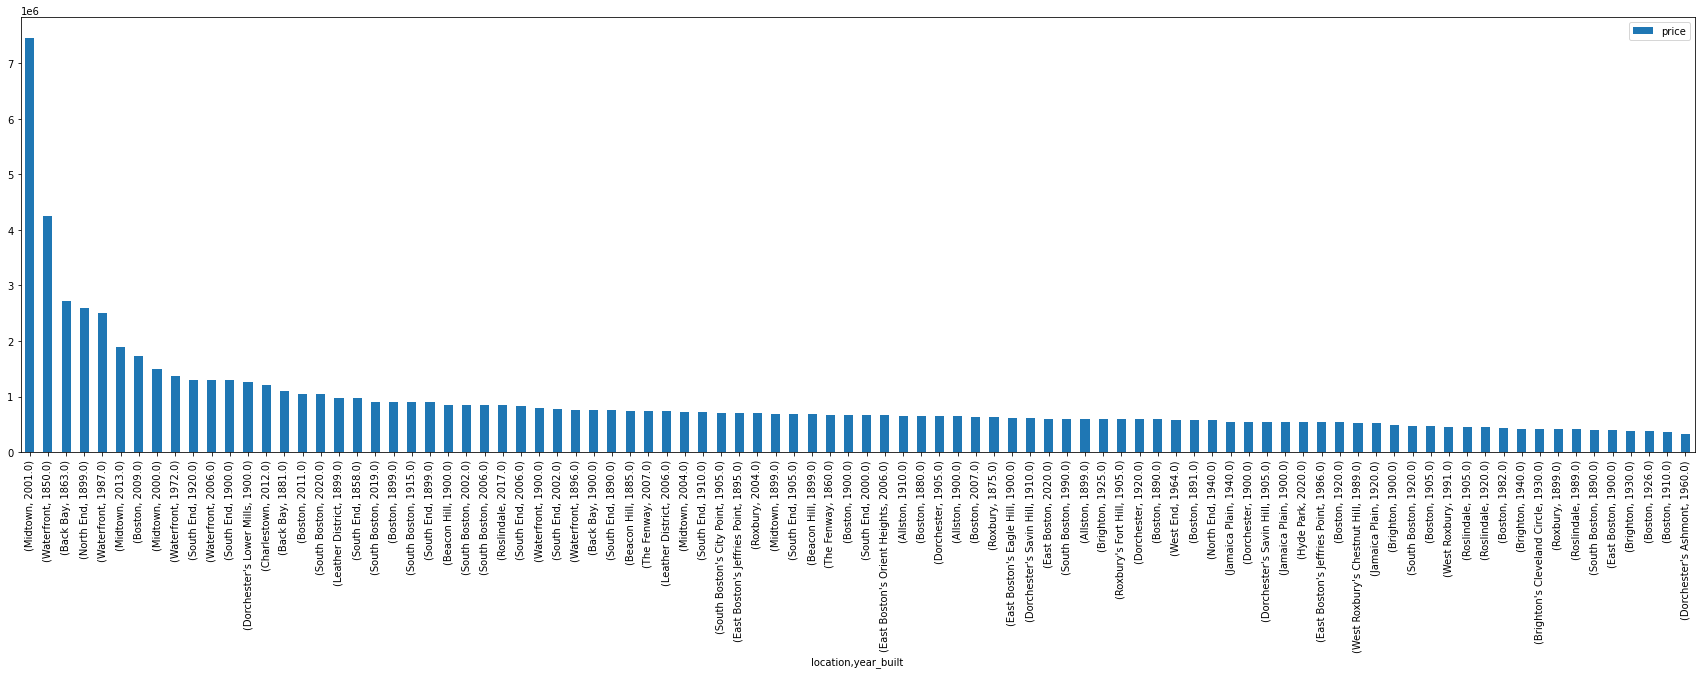

In [ ]:
#plot the average prices for each location from expensive to cheap (right to left)
avg_price.sort_values(['price'],ascending=False).plot(kind='bar',figsize=(30,8))

#Outliers

Rejection 3 points
z-score of 3 corresponds to a prob of 0.27%


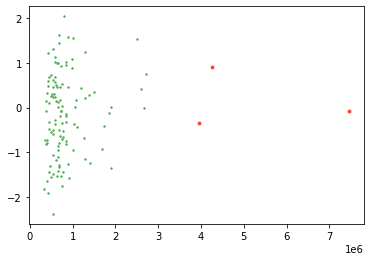

In [ ]:
#remove the red dots, they are outside the normal distribution(Gaussian)
mean,std=np.mean(df1['price']),np.std(df1['price'])
z_score = np.abs((df1['price']-mean)/std)
threshold=3
good=z_score<threshold

print(f'Rejection {(~good).sum()} points')
print(f'z-score of 3 corresponds to a prob of {100*2*norm.sf(threshold):0.2f}%')
visual_scatter = np.random.normal(size=df1['price'].size)
plt.scatter(df1['price'][good], visual_scatter[good], s=2, label='Good', color='#4CAF50')
plt.scatter(df1['price'][~good], visual_scatter[~good], s=8, label='Bad', color='#F44336')


#Annother way to trim outliers
Use LOF

In [ ]:
'''
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.005)
good = lof.fit_predict(df1) == 1
plt.scatter(df1[good, 0], df1[good, 1], s=2, label="Good", color="#4CAF50")
plt.scatter(df1[~good, 0], df1[~good, 1], s=8, label="Bad", color="#F44336")
plt.legend();
'''

'\nlof = LocalOutlierFactor(n_neighbors=20, contamination=0.005)\ngood = lof.fit_predict(df1) == 1\nplt.scatter(df1[good, 0], df1[good, 1], s=2, label="Good", color="#4CAF50")\nplt.scatter(df1[~good, 0], df1[~good, 1], s=8, label="Bad", color="#F44336")\nplt.legend();\n'

#Trim outliers (Recommended)

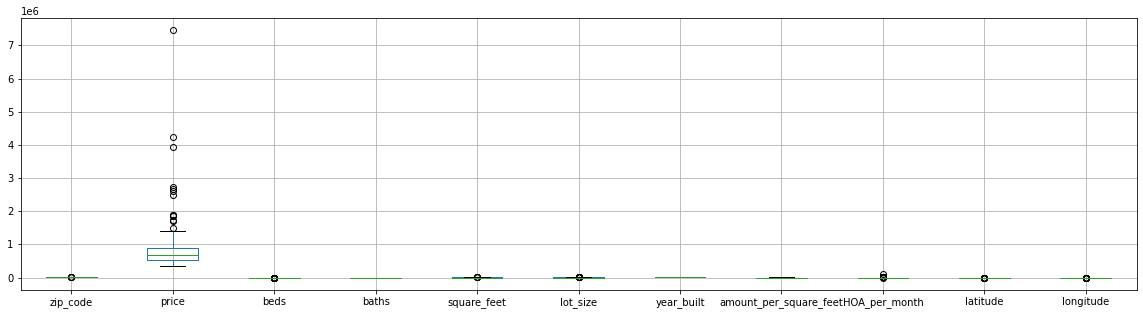

In [ ]:
plt.figure(figsize=(20,5))
df1.boxplot()

{'boxes': [<matplotlib.lines.Line2D at 0x7f7740120080>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7740120a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7740128550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f77401281d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7740120390>,
  <matplotlib.lines.Line2D at 0x7f7740120710>]}

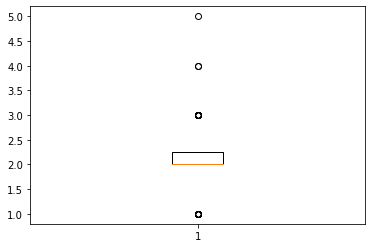

In [ ]:
plt.boxplot(df1['beds'])

In [ ]:
#Trim outliers:
starting_percentile = df1['price'].quantile(.05)
ending_percentile = df1['price'].quantile(.95)
price_outliers_df = df1.loc[((df1['price'] <= starting_percentile) | (df1['price'] >= ending_percentile))]
df_trimmed = df1.loc[((df1['price'] > starting_percentile) & (df1['price'] < ending_percentile))]

In [ ]:
print(df1.shape,df_trimmed.shape)

(116, 20) (104, 20)


In [ ]:
df_trimmed.to_csv('boston_housing_revised',index=False)

#TO BE Continued...